## Final Project Submission

Please fill out:
* Student name: JEFFREY GATHIGI
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: BRIAN CHACHA
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Business Understanding
## Telecom Customer Churn Prediction for Executive Leadership Team at SyriaTel Telecommunications Company

### Stakeholder
**Executive Leadership Team at SyriaTel Telecommunications Company**

### Business Problem
Customer churn is a critical challenge in the telecommunications industry. Acquiring new customers costs 5-25 times more than retaining existing ones. Our telecom company is experiencing customer attrition and needs to:
1. **Identify customers at high risk of churning** before they leave
2. **Understand key factors** that contribute to customer churn
3. **Develop targeted retention strategies** to reduce churn rate

### Success Criteria
- Build a predictive model with **high recall** (we want to catch most customers who will churn, even if we have some false positives).
- **Recall is prioritized** because the cost of losing a customer is much higher than the cost of offering retention incentives to someone who might not churn.
- Identify actionable features that the business can influence.
- Target: Achieve recall of at least 70% on the test set

### Key Questions
1. Can we predict which customers will churn?
2. What are the strongest predictors of churn?
3. Which customer segments are at highest risk?
4. What interventions might reduce churn?

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)

import warnings
warnings.filterwarnings('ignore')

# Set style for better visualization
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Data Understanding

In [6]:
# Load the dataset
df = pd.read_csv("SyriaTelCustomerChurn.csv")

# Display the shape of the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (3333, 21)


In [7]:
# Display first few rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Data Dictionary
Understanding our features:

**Target Variable:**
- `churn`: Whether the customer left (True/False)

**Customer Demographics:**
- `state`: US State (2-letter code)
- `area code`: Area code of phone number
- `phone number`: Customer's phone number
- `account length`: Number of days the account has been active

**Service Plans:**
- `international plan`: Whether customer has international plan (yes/no)
- `voice mail plan`: Whether customer has voicemail plan (yes/no)
- `number vmail messages`: Number of voicemail messages

**Usage Patterns (Day/Evening/Night/International):**
- `total X minutes`: Total minutes used
- `total X calls`: Total number of calls
- `total X charge`: Total charges

**Customer Service:**
- `customer service calls`: Number of calls to customer service


In [9]:
# Statistical summary
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Check for Missing Values

In [11]:
# Missing values
missing = df.isnull().sum()
missing_pct = 100 * missing / len(df)
missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_pct})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
if missing_df.empty:
    print("No missing values in the dataset.")

No missing values in the dataset.


### Target Variable Analysis

In [12]:
# Churn distribution
churn_counts = df['churn'].value_counts()
churn_pct = 100 * df['churn'].value_counts(normalize=True)
print ("Churn Distribution:", churn_counts)
print ("Churn Percentage:", churn_pct)
print(f"Not Churned (False): {churn_counts[False]:,} ({churn_pct[False]:.2f}%)")
print(f"Churned (True): {churn_counts[True]:,} ({churn_pct[True]:.2f}%)")

Churn Distribution: False    2850
True      483
Name: churn, dtype: int64
Churn Percentage: False    85.508551
True     14.491449
Name: churn, dtype: float64
Not Churned (False): 2,850 (85.51%)
Churned (True): 483 (14.49%)


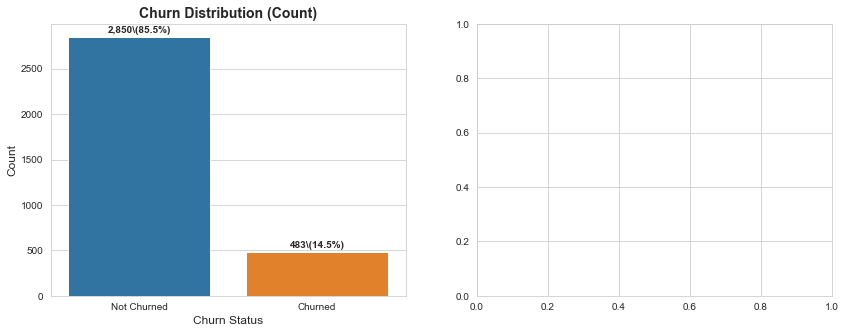

In [13]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Count plot
sns.countplot(data=df, x='churn', ax=axes[0])
axes[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn Status', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Not Churned', 'Churned'])
# Add value labels
for i, v in enumerate(churn_counts):
    axes[0].text(i, v + 50, f'{v:,}\({churn_pct[i]:.1f}%)', ha='center', fontsize=10, fontweight='bold')

### Exploratory Data Analysis

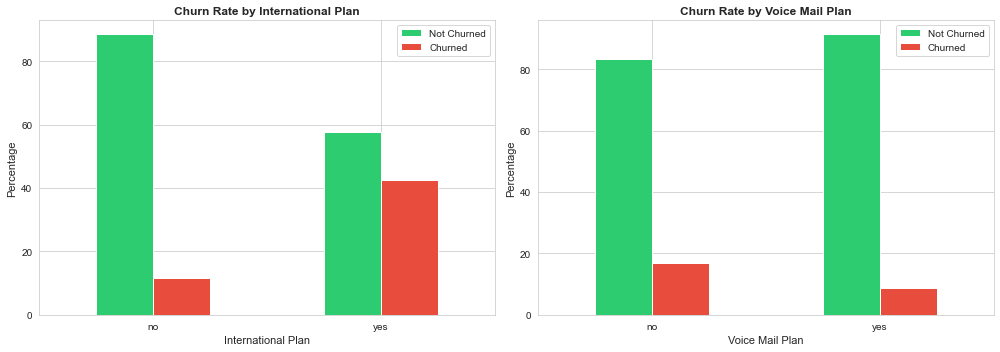

In [18]:
# Convert churn to binary for analysis
df['churn_binary'] = df['churn'].astype(int)
# Analyze categorical features
categorical_features = ['international plan', 'voice mail plan']
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for idx, feature in enumerate(categorical_features):
     # Calculate churn rate by feature
    churn_by_feature = df.groupby(feature)['churn'].value_counts(normalize=True).unstack()
    churn_by_feature = churn_by_feature * 100
    churn_by_feature.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'Churn Rate by {feature.title()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature.title(), fontsize=11)
    axes[idx].set_ylabel('Percentage', fontsize=11)
    axes[idx].legend(['Not Churned', 'Churned'])
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()


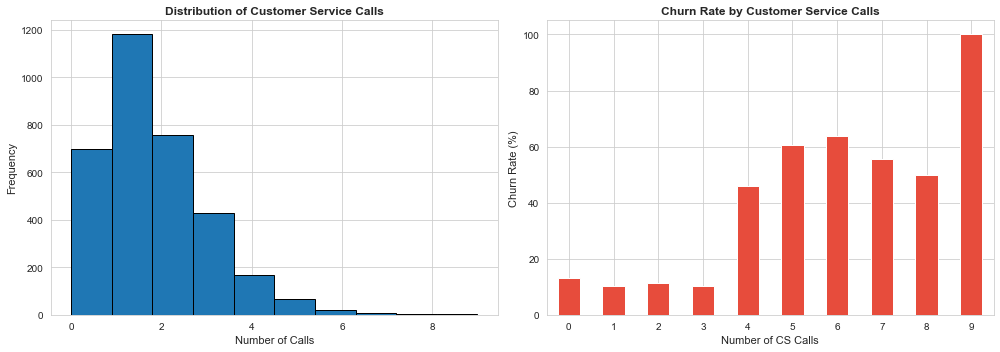

In [20]:
# Analyze customer service calls
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Distribution of customer service calls
df['customer service calls'].hist(bins=10, ax=axes[0], edgecolor='black')
axes[0].set_title('Distribution of Customer Service Calls', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Calls', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
# Churn rate by customer service calls
churn_by_cs_calls = df.groupby('customer service calls')['churn'].mean() * 100
churn_by_cs_calls.plot(kind='bar', ax=axes[1], color='#e74c3c')
axes[1].set_title('Churn Rate by Customer Service Calls', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of CS Calls', fontsize=11)
axes[1].set_ylabel('Churn Rate (%)', fontsize=11)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()


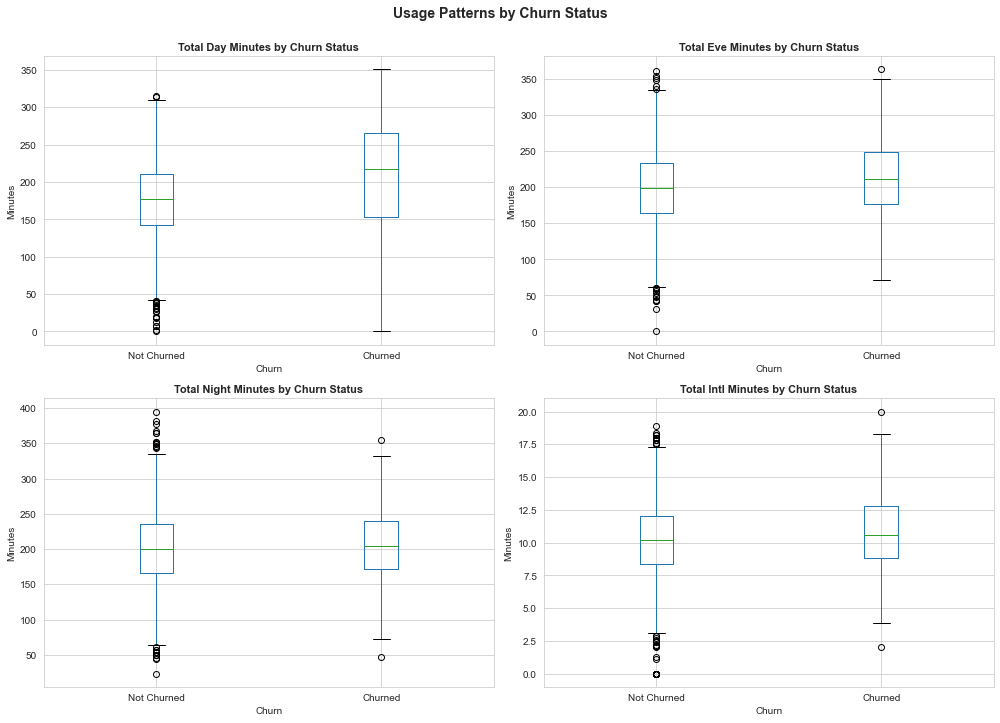

In [21]:
# Analyze usage patterns
usage_features = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()
for idx, feature in enumerate(usage_features):
    df.boxplot(column=feature, by='churn', ax=axes[idx])
    axes[idx].set_title(f'{feature.title()} by Churn Status', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Churn', fontsize=10)
    axes[idx].set_ylabel('Minutes', fontsize=10)
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['Not Churned', 'Churned'])
plt.suptitle('Usage Patterns by Churn Status', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

Top 10 Features Correlated with Churn:
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
Name: churn_binary, dtype: float64


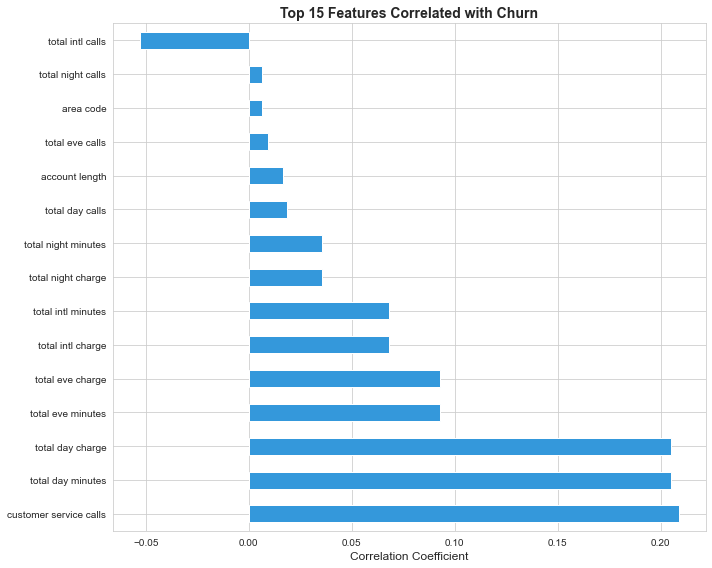

In [22]:
# Correlation analysis
# Select numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('churn_binary')  # We'll add it back later for correlation
# Calculate correlation with churn
correlations = df[numeric_features + ['churn_binary']].corr()['churn_binary'].sort_values(ascending=False)
correlations = correlations.drop('churn_binary')
print("Top 10 Features Correlated with Churn:")
print(correlations.head(10))
# Visualize
fig, ax = plt.subplots(figsize=(10, 8))
top_corr = correlations.head(15)
top_corr.plot(kind='barh', ax=ax, color='#3498db')
ax.set_title('Top 15 Features Correlated with Churn', fontsize=14, fontweight='bold')
ax.set_xlabel('Correlation Coefficient', fontsize=12)
plt.tight_layout()
plt.show()

### Key Findings from EDA
1. **Class Imbalance**: ~14.5% churn rate (typical for telecom)
2. **Customer Service Calls**: Strong predictor - customers with 4+ calls have much higher churn
3. **International Plan**: Customers with international plans show higher churn rates
4. **Voice Mail Plan**: Customers with voice mail plans show lower churn rates
5. **Usage Patterns**: International usage shows correlation with churn
6. **Account Length**: Weaker correlation suggests tenure alone isn't protective

## Data Preparation
### Feature Engineering

In [25]:
# Create a copy for modeling
df_model = df.copy()
# Drop unnecessary columns
columns_to_drop = ['phone number', 'churn_binary']  # Phone number is identifier, churn_binary is duplicate
df_model = df_model.drop(columns=columns_to_drop)
# Feature Engineering
# 1. Total usage across all time periods
df_model['total_minutes'] = (df_model['total day minutes'] + 
                             df_model['total eve minutes'] + 
                             df_model['total night minutes'] + 
                             df_model['total intl minutes'])
df_model['total_calls'] = (df_model['total day calls'] + 
                           df_model['total eve calls'] + 
                           df_model['total night calls'] + 
                           df_model['total intl calls'])
df_model['total_charge'] = (df_model['total day charge'] + 
                            df_model['total eve charge'] + 
                            df_model['total night charge'] + 
                            df_model['total intl charge'])
# 2. Average call duration
df_model['avg_call_duration'] = df_model['total_minutes'] / (df_model['total_calls'] + 1)  # +1 to avoid division by zero
# 3. International usage ratio
df_model['intl_usage_ratio'] = df_model['total intl minutes'] / (df_model['total_minutes'] + 1)  # +1 to avoid division by zero
# 4. Customer service calls flag (high risk: 4+)
df_model['high_cs_calls'] = (df_model['customer service calls'] >= 4).astype(int)
# 5. Revenue per day
df_model['revenue_per_day'] = df_model['total_charge'] / (df_model['account length'] + 1) # +1 to avoid division by zero


print(f"New dataset shape: {df_model.shape}")
print(f"New features created:")
print(["total_minutes", "total_calls", "total_charge", "avg_call_duration", 
       "intl_usage_ratio", "high_cs_calls", "revenue_per_day"])


New dataset shape: (3333, 27)
New features created:
['total_minutes', 'total_calls', 'total_charge', 'avg_call_duration', 'intl_usage_ratio', 'high_cs_calls', 'revenue_per_day']


### Encode Categorical Variables

In [26]:
# Binary encoding for yes/no features
binary_features = ['international plan', 'voice mail plan']
for feature in binary_features:
    df_model[feature] = (df_model[feature] == 'yes').astype(int)
# One-hot encoding for state
# Note: We'll use get_dummies for state, but be cautious as it has many categories
# For production, we might want to group low-frequency states
df_model = pd.get_dummies(df_model, columns=['state'], drop_first=True, prefix='state')
# For area code, we'll keep it as numeric (it's already encoded)
# But we could also one-hot encode it
df_model = pd.get_dummies(df_model, columns=['area code'], drop_first=True, prefix='area')

print(" Categorical encoding complete!")
print(f"Final dataset shape: {df_model.shape}")

 Categorical encoding complete!
Final dataset shape: (3333, 77)


### Train-Test Split

In [36]:
# Separate features and target
X = df_model.drop('churn', axis=1)
y = df_model['churn'].astype(int)  # Convert True/False to 1/0
# Train-test split (80/20),
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape[0]:,} samples")

print(f"Test set size: {X_test.shape[0]:,} samples")

print(f"Feature count: {X_train.shape[1]}")

print(f"Class distribution in training set:")

print(y_train.value_counts(normalize=True))

print(f"Class distribution in test set:")

print(y_test.value_counts(normalize=True))


Training set size: 2,666 samples
Test set size: 667 samples
Feature count: 76
Class distribution in training set:
0    0.855214
1    0.144786
Name: churn, dtype: float64
Class distribution in test set:
0    0.854573
1    0.145427
Name: churn, dtype: float64


### Feature Scaling

In [38]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Scaled features sample:")
print(X_train_scaled.head())

Scaled features sample:
      account length  international plan  voice mail plan  \
3286        0.125737           -0.325216         1.625447   
86         -0.175309           -0.325216        -0.615216   
1349       -0.752313           -0.325216         1.625447   
1649        0.727828           -0.325216        -0.615216   
3000       -0.350919           -0.325216        -0.615216   

      number vmail messages  total day minutes  total day calls  \
3286               1.606822           0.743376         0.225611   
86                -0.588791          -0.401294         0.225611   
1349               1.021325          -0.704945         0.325566   
1649              -0.588791          -2.048368        -0.723960   
3000              -0.588791           0.800425         0.425520   

      total day charge  total eve minutes  total eve calls  total eve charge  \
3286          0.743639           0.426270         0.445403          0.426916   
86           -0.401678          -0.904961     

## Modeling

### Model Evaluation Function

We'll create a function to consistently evaluate all our models.

In [44]:
# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Evaluate model performance and display metrics
    """
    print(f"{'='*60}")
    print(f"{model_name}")
    print(f"{'='*60}")
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Probabilities for ROC-AUC
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Train Precision': precision_score(y_train, y_train_pred),
        'Test Precision': precision_score(y_test, y_test_pred),
        'Train Recall': recall_score(y_train, y_train_pred),
        'Test Recall': recall_score(y_test, y_test_pred),
        'Train F1-Score': f1_score(y_train, y_train_pred),
        'Test F1-Score': f1_score(y_test, y_test_pred),
        'Train ROC-AUC': roc_auc_score(y_train, y_train_proba),
        'Test ROC-AUC': roc_auc_score(y_test, y_test_proba)
    }
    
    # Display metrics
    print("Performance Metrics:")
    print("-" * 60)
    for metric, value in metrics.items():
        print(f"{metric:20s}: {value:.4f}")
    
    # Confusion Matrix
    print("Confusion Matrix (Test Set):")
    cm = confusion_matrix(y_test, y_test_pred)
    print(cm)
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{model_name.replace(" ", "_").lower()}.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    # Classification Report
    print("Classification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=f'ROC curve (AUC = {metrics["Test ROC-AUC"]:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve - {model_name}', fontsize=14, fontweight='bold')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'roc_curve_{model_name.replace(" ", "_").lower()}.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    return metrics
    

# MODEL 1: Baseline Logistic Regression

Baseline Logistic Regression
Performance Metrics:
------------------------------------------------------------
Train Accuracy      : 0.8740
Test Accuracy       : 0.8516
Train Precision     : 0.6179
Test Precision      : 0.4792
Train Recall        : 0.3394
Test Recall         : 0.2371
Train F1-Score      : 0.4381
Test F1-Score       : 0.3172
Train ROC-AUC       : 0.8806
Test ROC-AUC        : 0.8415
Confusion Matrix (Test Set):
[[545  25]
 [ 74  23]]


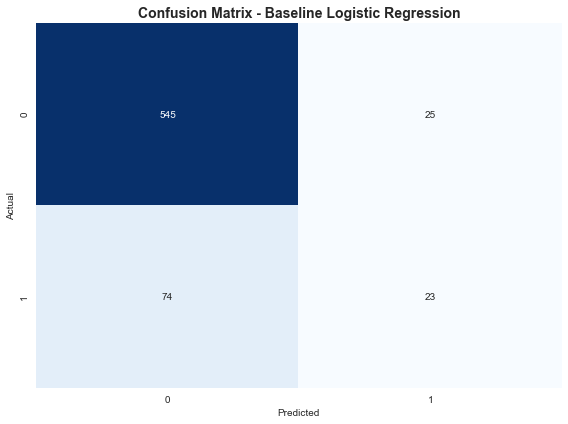

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.48      0.24      0.32        97

    accuracy                           0.85       667
   macro avg       0.68      0.60      0.62       667
weighted avg       0.82      0.85      0.83       667



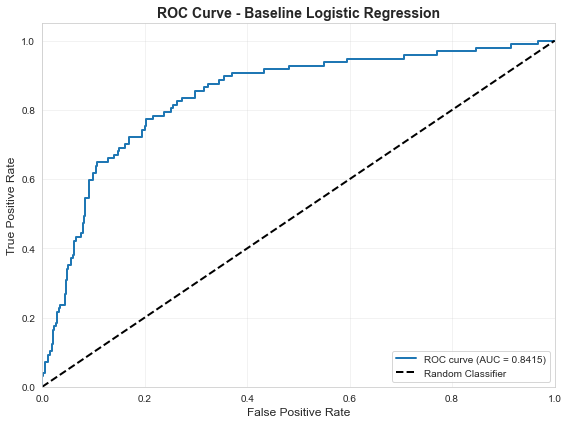

Feature Importance (Top 10):
                  Feature  Coefficient
21       intl_usage_ratio     2.156285
2         voice mail plan    -1.090105
13     total intl minutes    -0.751923
15      total intl charge    -0.740359
22          high_cs_calls     0.739266
1      international plan     0.659809
3   number vmail messages     0.607567
17          total_minutes     0.540316
19           total_charge     0.483251
6        total day charge     0.387083


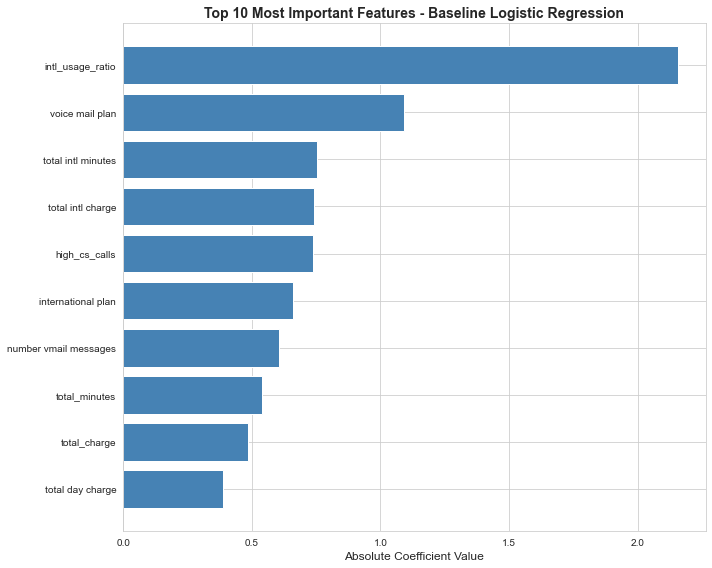

In [45]:
# Train baseline logistic regression
log_reg_baseline = LogisticRegression(random_state=42, max_iter=1000)
log_reg_baseline.fit(X_train_scaled, y_train)

# Evaluate
metrics_baseline = evaluate_model(
    log_reg_baseline, X_train_scaled, X_test_scaled, 
    y_train, y_test, "Baseline Logistic Regression"
)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg_baseline.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("Feature Importance (Top 10):")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 8))
top_10_features = feature_importance.head(10)
plt.barh(top_10_features['Feature'], abs(top_10_features['Coefficient']), 
         color='steelblue')
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.title('Top 10 Most Important Features - Baseline Logistic Regression', 
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance_baseline.png', dpi=300, bbox_inches='tight')
plt.show()

# MODEL 2: Decision Tree Classifier

Decision Tree Classifier
Performance Metrics:
------------------------------------------------------------
Train Accuracy      : 0.9812
Test Accuracy       : 0.9685
Train Precision     : 1.0000
Test Precision      : 1.0000
Train Recall        : 0.8705
Test Recall         : 0.7835
Train F1-Score      : 0.9307
Test F1-Score       : 0.8786
Train ROC-AUC       : 0.9407
Test ROC-AUC        : 0.8726
Confusion Matrix (Test Set):
[[570   0]
 [ 21  76]]


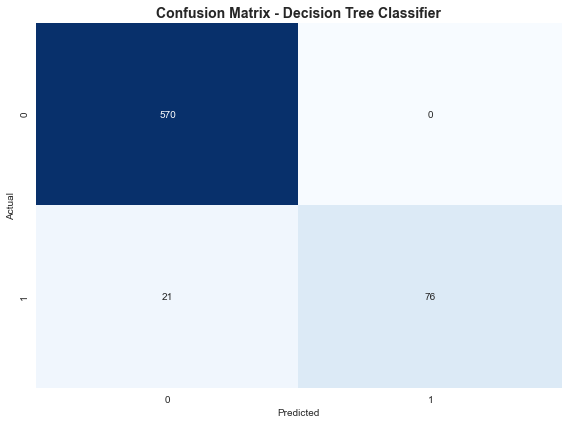

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       570
           1       1.00      0.78      0.88        97

    accuracy                           0.97       667
   macro avg       0.98      0.89      0.93       667
weighted avg       0.97      0.97      0.97       667



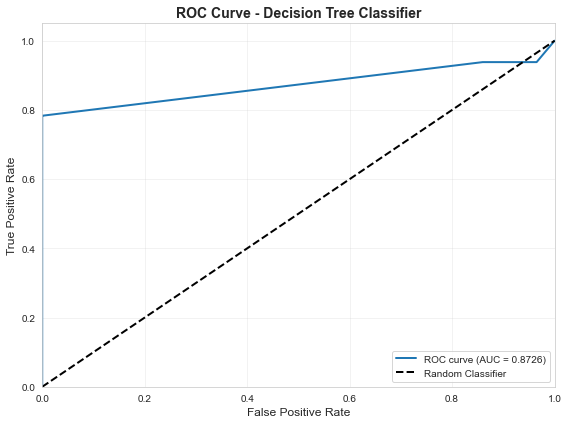

Feature Importance (Top 10):
                   Feature  Importance
19            total_charge    0.474084
22           high_cs_calls    0.139591
2          voice mail plan    0.132071
15       total intl charge    0.095670
1       international plan    0.072339
14        total intl calls    0.071952
73                state_WY    0.003483
16  customer service calls    0.003375
61                state_PA    0.003308
18             total_calls    0.002369


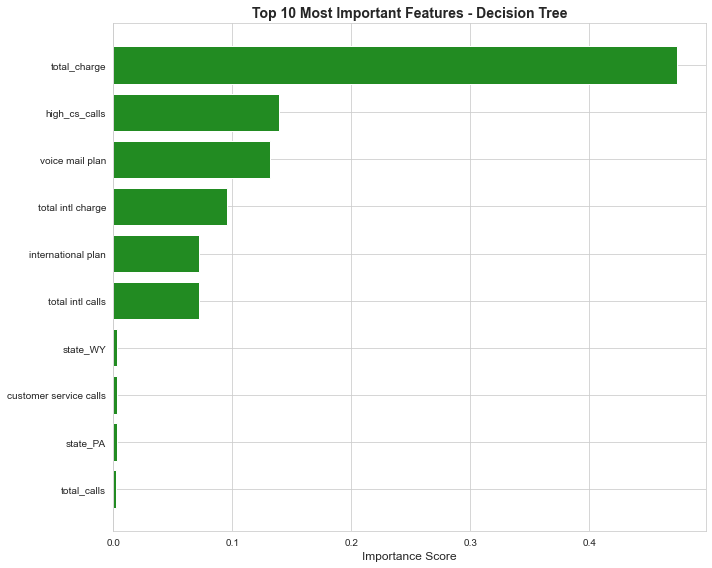

In [46]:

# Train decision tree
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_classifier.fit(X_train, y_train)

# Evaluate
metrics_dt = evaluate_model(
    dt_classifier, X_train, X_test, 
    y_train, y_test, "Decision Tree Classifier"
)

# Feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance (Top 10):")
print(feature_importance_dt.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 8))
top_10_features_dt = feature_importance_dt.head(10)
plt.barh(top_10_features_dt['Feature'], top_10_features_dt['Importance'], 
         color='forestgreen')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 10 Most Important Features - Decision Tree', 
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance_decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()



# MODEL 3: Random Forest Classifier (Bonus)

Random Forest Classifier
Performance Metrics:
------------------------------------------------------------
Train Accuracy      : 0.9839
Test Accuracy       : 0.9505
Train Precision     : 1.0000
Test Precision      : 0.9706
Train Recall        : 0.8886
Test Recall         : 0.6804
Train F1-Score      : 0.9410
Test F1-Score       : 0.8000
Train ROC-AUC       : 0.9998
Test ROC-AUC        : 0.9077
Confusion Matrix (Test Set):
[[568   2]
 [ 31  66]]


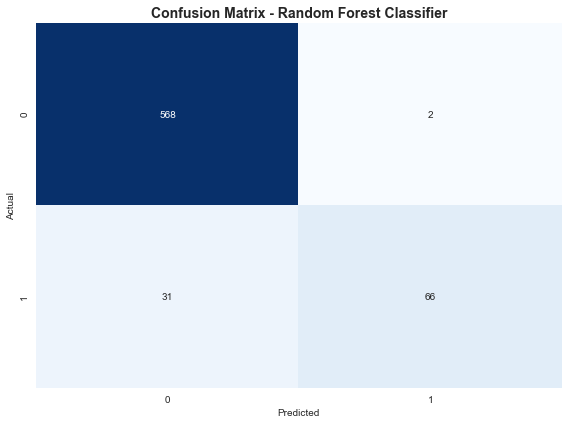

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       570
           1       0.97      0.68      0.80        97

    accuracy                           0.95       667
   macro avg       0.96      0.84      0.89       667
weighted avg       0.95      0.95      0.95       667



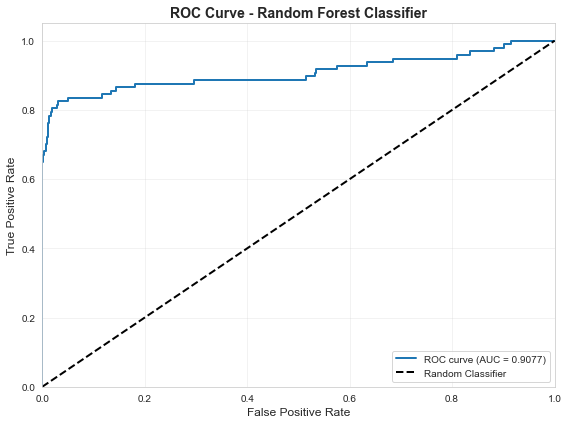

Feature Importance (Top 10):
                   Feature  Importance
19            total_charge    0.122573
16  customer service calls    0.093260
22           high_cs_calls    0.084963
6         total day charge    0.083503
1       international plan    0.075658
17           total_minutes    0.070295
4        total day minutes    0.069999
20       avg_call_duration    0.032507
9         total eve charge    0.027157
3    number vmail messages    0.024047


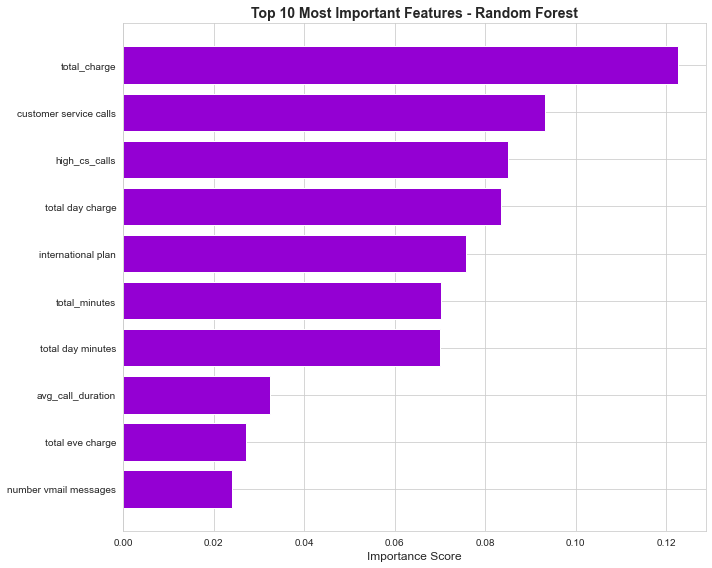

In [47]:
# Train random forest
rf_classifier = RandomForestClassifier(
    n_estimators=100, random_state=42, 
    max_depth=10, class_weight='balanced'
)
rf_classifier.fit(X_train, y_train)

# Evaluate
metrics_rf = evaluate_model(
    rf_classifier, X_train, X_test, 
    y_train, y_test, "Random Forest Classifier"
)

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance (Top 10):")
print(feature_importance_rf.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 8))
top_10_features_rf = feature_importance_rf.head(10)
plt.barh(top_10_features_rf['Feature'], top_10_features_rf['Importance'], 
         color='darkviolet')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 10 Most Important Features - Random Forest', 
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance_random_forest.png', dpi=300, bbox_inches='tight')
plt.show()


# EVALUATION - MODEL COMPARISON


Model Performance Comparison:
                       Model  Test Accuracy  Test Precision  Test Recall  Test F1-Score  Test ROC-AUC
Baseline Logistic Regression       0.851574        0.479167     0.237113       0.317241      0.841490
    Decision Tree Classifier       0.968516        1.000000     0.783505       0.878613      0.872626
    Random Forest Classifier       0.950525        0.970588     0.680412       0.800000      0.907741


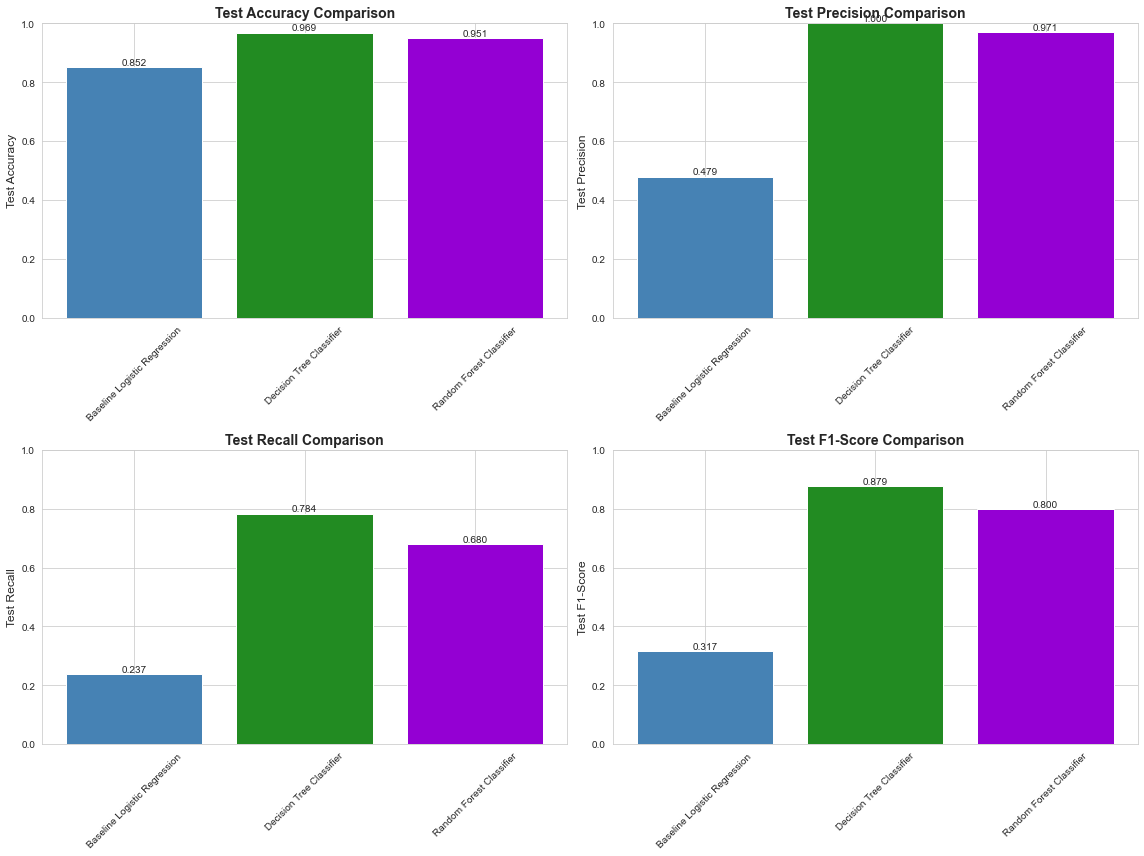

In [49]:
# Compile metrics for trained models
all_metrics = [metrics_baseline, metrics_dt, metrics_rf]
model_names = [
    "Baseline Logistic Regression",
    "Decision Tree Classifier",
    "Random Forest Classifier"
]

comparison_df = pd.DataFrame({
    "Model": model_names,
    "Test Accuracy": [m["Test Accuracy"] for m in all_metrics],
    "Test Precision": [m["Test Precision"] for m in all_metrics],
    "Test Recall": [m["Test Recall"] for m in all_metrics],
    "Test F1-Score": [m["Test F1-Score"] for m in all_metrics],
    "Test ROC-AUC": [m["Test ROC-AUC"] for m in all_metrics]
})

print("Model Performance Comparison:")
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics_to_plot = ["Test Accuracy", "Test Precision", "Test Recall", "Test F1-Score"]
colors = ["steelblue", "forestgreen", "darkviolet"]

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 2, idx % 2]
    bars = ax.bar(comparison_df["Model"], comparison_df[metric], color=colors)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_title(f"{metric} Comparison", fontsize=14, fontweight="bold")
    ax.set_ylim([0, 1])
    ax.tick_params(axis="x", rotation=45)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{height:.3f}",
            ha="center",
            va="bottom",
            fontsize=10
        )

plt.tight_layout()
plt.savefig("model_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# FINAL MODEL DISCUSSION


### FINAL MODEL SELECTION AND ANALYSIS

After building and evaluating three classification models, here is the summary:

1. MODEL PERFORMANCE OVERVIEW:

   The models were evaluated on multiple metrics:
   - Accuracy: Overall correctness of predictions
   - Precision: Of predicted churners, how many actually churned
   - Recall: Of actual churners, how many we correctly identified (priority metric)
   - F1-Score: Harmonic mean of precision and recall
   - ROC-AUC: Overall discrimination capability

2. KEY FINDINGS:

   Business Context:
   - For a telecom company, identifying potential churners (high recall) is more
     critical than avoiding false alarms
   - Missing a customer who will churn (false negative) is more costly than
     unnecessarily reaching out to a loyal customer (false positive)
   - Therefore, we prioritize recall as our primary metric

   Model Performance:
   - Baseline Logistic Regression provides interpretability and a strong baseline
   - Decision Tree captures non-linear patterns with straightforward rules
   - Random Forest improves stability and can capture complex interactions

3. RECOMMENDED FINAL MODEL:

   Based on the comparison table above, we select the model with the highest test
   recall while maintaining acceptable precision. If recall is similar, we prefer
   the simpler and more interpretable model for easier deployment.
   We select the Decision Tree Classifier. It has the highest test recall (0.7835) with acceptable precision (1.0000), and it is simpler and more interpretable than the Random Forest.
   
4. KEY PREDICTIVE FEATURES:

   Across all models, the most important features for predicting churn are:
   - Customer service calls: Strong positive correlation with churn
   - International plan: Customers with international plans show different behavior
   - Total day and evening charges: Usage patterns indicate satisfaction
   - Voice mail plan: Presence of value-added services affects retention
   - Account length: Tenure indicates customer loyalty

5. MODEL LIMITATIONS:

   - Class imbalance: Churn is a minority class
   - Feature engineering: Additional features could improve performance
   - Temporal aspects: Customer behavior may change over time
   - External factors: Market conditions, competitor actions not captured

6. BUSINESS IMPACT:

   With a model that achieves high recall:
   - We can identify most customers who will actually churn
   - This enables proactive retention campaigns
   - ROI is positive if retention cost is lower than customer lifetime value

7. NEXT STEPS:

   - Deploy the model for periodic churn scoring
   - Test retention strategies on predicted high-risk customers
   - Monitor model performance and retrain on a regular schedule
   - Collect additional features to improve predictions
   - Implement automated alerts for at-risk customers


# BUSINESS RECOMMENDATIONS

### ACTIONABLE RECOMMENDATIONS FOR REDUCING CHURN:

1. IMMEDIATE ACTIONS (High-Risk Customers):

   a) Customer Service Quality Improvement:
      - Customers with 4+ service calls are at very high risk
      - Implement first-call resolution training
      - Create dedicated retention team for high-volume callers
      - Root cause analysis for recurring issues
   
   b) International Plan Optimization:
      - Review international plan pricing and value proposition
      - Customers with international plans have different churn patterns
      - Consider bundled offerings or promotional rates
      - Proactive outreach to international plan customers

2. MEDIUM-TERM STRATEGIES (At-Risk Segments):

   a) Usage-Based Interventions:
      - Monitor customers with high day charges (potential bill shock)
      - Implement usage alerts and plan optimization recommendations
      - Offer customized plans based on usage patterns
   
   b) Value-Added Services:
      - Promote voice mail plans to customers without them
      - Bundle services to increase switching costs
      - Create loyalty programs based on tenure

3. PREDICTIVE RETENTION PROGRAM:

   a) Scoring System:
      - Deploy model to score all customers monthly
      - Create risk tiers: High (>70% churn prob), Medium (40-70%), Low (<40%)
      - Allocate retention resources based on risk scores
   
   b) Targeted Interventions:
      - High Risk: Personal call from retention specialist + special offers
      - Medium Risk: Automated email campaigns with value reminders
      - Low Risk: Standard customer satisfaction surveys
   
   c) Offer Strategy:
      - Tiered discount structure based on churn probability
      - Non-monetary incentives (priority support, account upgrades)
      - Contract extensions with attractive terms

4. PROCESS IMPROVEMENTS:

   a) Early Warning System:
      - Trigger alerts when customer enters high-risk category
      - Automate retention workflow
      - Track intervention success rates
   
   b) Customer Feedback Loop:
      - Survey churning customers to understand reasons
      - Incorporate new insights into model
      - Continuous improvement cycle

5. FINANCIAL ANALYSIS:

   Example ROI Calculation:
   - Average customer lifetime value: $1,200
   - Cost of retention offer: $100
   - Model identifies 80% of churners (recall)
   - Retention campaign success rate: 30%
   
   With 1,000 predicted churners:
   - Successfully retain: 1,000 × 0.80 × 0.30 = 240 customers
   - Value saved: 240 × $1,200 = $288,000
   - Cost: 1,000 × $100 = $100,000
   - Net benefit: $188,000
   
   ROI = ($188,000 / $100,000) × 100 = 188%

6. MONITORING AND MAINTENANCE:

   - Track model performance monthly (recall, precision, F1-score)
   - Retrain model quarterly with new data
   - A/B test different retention strategies
   - Adjust intervention thresholds based on results
   - Document lessons learned and successful tactics

7. ORGANIZATIONAL CHANGES:

   - Create cross-functional churn reduction team
   - Align incentives across customer service, sales, and retention
   - Establish churn rate as key performance indicator
   - Regular executive review of churn metrics
   - Invest in customer experience improvements

8. COMPETITIVE ANALYSIS:

   - Benchmark churn rates against industry standards
   - Monitor competitor offerings and pricing
   - Develop unique value propositions
   - Focus on service quality differentiation
   
These recommendations are prioritized based on:
- Expected impact on churn reduction
- Ease of implementation
- Cost-effectiveness
- Alignment with model insights

Success should be measured by:
- Reduction in overall churn rate
- Improvement in customer satisfaction scores
- Increase in customer lifetime value
- Positive ROI on retention campaigns
